In [3]:
#Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
#1.Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.
df1 = pd.read_csv("all_data_copy.csv")
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
#We have a csv file having month wise sales data for electronic items. 
#The data set has order details consisting of order ID, Product, Quantity, Price and Date along with purchase address.



#Understanding the data
#We can see that we have 6 columns.
#Order ID : ID for the products that have been ordered or purchased.
#Product : Name of the products
#Quantity Ordered : Quantity of the product purchased at a time
#Price : Price against each order
#Date : Date of purchase of the product
#Purchase address : address of the purchase.

In [6]:
#2.Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
df1.shape

(373700, 6)

In [8]:
df1.info() # This lets us look at the datatype of each column and the non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [9]:
'''From the above, we can infer that we have 373700 values out which 372610 are non-null values. That means we have null values
   present in the data set.'''

'From the above, we can infer that we have 373700 values out which 372610 are non-null values. That means we have null values\n   present in the data set.'

In [10]:
df1.isna().sum() # Number of null values under each column 

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [11]:
'''We have 1090 na values in the dataset.'''

'We have 1090 na values in the dataset.'

In [12]:
#We use .isna().any(axis=1) to spot rows containing the NaN values (axis = 0 to spot column containing NaN values). 

df1.isna().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
373695    False
373696    False
373697    False
373698    False
373699    False
Length: 373700, dtype: bool

In [13]:
#Now, we’re gonna remove it from our dataframe using .dropna() method.
df1.dropna(inplace = True)

In [14]:
#There are values “Or” in our data.
''' While i was adding the month column and converting it's datatype to integer , i got an error message - 
    invalid literal for int with base 10 : Or'''

" While i was adding the month column and converting it's datatype to integer , i got an error message - \n    invalid literal for int with base 10 : Or"

In [15]:
#It seems there are few non-integer values in the Order date column
#Check the "Or" string in the Order data column.

df_dummy = df1[df1['Order Date'].str[0:2] == 'Or']
df_dummy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
'''We can see clearly from above that the issue is the rows contain the same words as the title rows.
  So clearly ‘Or’ is coming from ’Order Date’. We need to drop this “Or” rows,  just change the equal sign (“==”) to not 
  equal sign (“!=”).We are doing this step ahead.'''

'We can see clearly from above that the issue is the rows contain the same words as the title rows.\n  So clearly ‘Or’ is coming from ’Order Date’. We need to drop this “Or” rows,  just change the equal sign (“==”) to not \n  equal sign (“!=”).We are doing this step ahead.'

In [17]:
#Removing rows based on condition, finding 'Or' and delete it
df1 = df1[df1['Order Date'].str[0:2]!='Or']

In [18]:
#We will now add a “Month” column to this dataset by extracting the month details from the Order Date column.
#First 2 characters of the Order data column refers to month.
#Add "Month" Column
df1['Month'] = df1['Order Date'].str[0:2] #Get the first 2 characters.
df1['Month'] = df1['Month'].astype('int32') #turning the data from string to integer

<ipython-input-18-d8f6bcd245a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1['Order Date'].str[0:2] #Get the first 2 characters.
<ipython-input-18-d8f6bcd245a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1['Month'].astype('int32') #turning the data from string to integer


In [19]:
#The values of the column “Quantity Ordered” and “Price Each” are strings. 
#So the next task is to convert these columns to the correct type (“Quantity Ordered” is integer and “Price Each” is float). 
#We will use pd.to_numeric() method to convert them to numeric.
df1['Quantity Ordered'] = pd.to_numeric(df1['Quantity Ordered']) #Becoming integer
df1['Price Each'] = pd.to_numeric(df1['Price Each']) #Becoming float

<ipython-input-19-a5f5c7069652>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Quantity Ordered'] = pd.to_numeric(df1['Quantity Ordered']) #Becoming integer
<ipython-input-19-a5f5c7069652>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price Each'] = pd.to_numeric(df1['Price Each']) #Becoming float


In [20]:
#  We need to get one more column called “Sales” Column. 
#We get “Sales” by multiplying “Quantity Ordered” and “Price Each” values.
df1['Sales'] = df1['Quantity Ordered']*df1['Price Each']
df1.head()

<ipython-input-20-703ce9b812cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales'] = df1['Quantity Ordered']*df1['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [21]:
df1.isna().sum() # There are no null values now. We have successfully removed na values.

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
dtype: int64

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  object 
 1   Product           371900 non-null  object 
 2   Quantity Ordered  371900 non-null  int64  
 3   Price Each        371900 non-null  float64
 4   Order Date        371900 non-null  object 
 5   Purchase Address  371900 non-null  object 
 6   Month             371900 non-null  int32  
 7   Sales             371900 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 24.1+ MB


In [23]:
df1.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   54
dtype: int64

In [24]:
df1.describe()

,Quantity Ordered,Price Each,Month,Sales
count,371900.000000,371900.000000,371900.000000,371900.000000
mean,1.124383,184.399735,7.059140,185.490917
std,0.442792,332.730883,3.502991,332.919324
min,1.000000,2.990000,1.000000,2.990000
25%,1.000000,11.950000,4.000000,11.950000
50%,1.000000,14.950000,7.000000,14.950000
75%,1.000000,150.000000,10.000000,150.000000
max,9.000000,1700.000000,12.000000,3400.000000


In [25]:
#3.Provide a summary of the cleaned dataset along with some preliminary analysis 
#and contrast it with the uncleaned dataset wherever modifications are made.

'''1.The cleaned dataset has 8 columns. Unlike the uncleaned dataset that has 6 columns.
2.The two new columns added in the cleaned data are Month and Sales as we would need it to solve the problems asked.
3.The columns - "Quantity ordered" and "Price Each" has been converted to integer datatype which were of the datatype object
in the uncleaned data.
4.Month and Sales column also has been generated with datatype integer
5.There were rows with the same words as the column names instead of values in the uncleaned dataset.This was removed for the
cleaned dataset.
6.There were 1090 null values. These were also dropped.
7.The preliminary analysis done were,
  a) importing dataset
  b) Dropping na values and repeated values
  c)Display information regarding datatypes and non-null values
  d) Display null values
  e) Display info() and checking null value after cleaning the data.
  f)The describe() method is used for calculating some statistical data like percentile, 
    mean and std of the numerical values of the Series or DataFrame'''

'1.The cleaned dataset has 8 columns. Unlike the uncleaned dataset that has 6 columns.\n2.The two new columns added in the cleaned data are Month and Sales as we would need it to solve the problems asked.\n3.The columns - "Quantity ordered" and "Price Each" has been converted to integer datatype which were of the datatype object\nin the uncleaned data.\n4.Month and Sales column also has been generated with datatype integer\n5.There were rows with the same words as the column names instead of values in the uncleaned dataset.This was removed for the\ncleaned dataset.\n6.There were 1090 null values. These were also dropped.\n7.The preliminary analysis done were,\n  a) importing dataset\n  b) Dropping na values and repeated values\n  c)Display information regarding datatypes and non-null values\n  d) Display null values\n  e) Display info() and checking null value after cleaning the data.\n  f)The describe() method is used for calculating some statistical data like percentile, \n    mean a

# Exploratory Data Analysis

###  1.What is the distribution of sales among different cities in different months?

In [26]:
#We would need a month and city column to answer this along with the sales.
# Add a city column
#Extract the city and the state

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

# WE call the .apply() method on the dataframe. Then use the lambda function to iterate over the rows of the dataframe.
#df1['City'] = df1['Purchase Address'].apply(lambda x: get_city(x))
# Two Cities in Different States may have Same Name therefore State should be considered.

df1['City'] = df1['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df1.head()

<ipython-input-26-f536aa3be8a7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['City'] = df1['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [27]:
'''apply and lambda usually used to create new column based on other column.In this case we create “City” column based 
on “Purchase Address” column and we split the data into 3 part. The first one is before the first comma (index = 0), 
the second one is between the commas (index = 1), and the third on is after the last comma (index = 2). As we need 
to extract the city data, we use [1] to state it to index 1.'''

'apply and lambda usually used to create new column based on other column.In this case we create “City” column based \non “Purchase Address” column and we split the data into 3 part. The first one is before the first comma (index = 0), \nthe second one is between the commas (index = 1), and the third on is after the last comma (index = 2). As we need \nto extract the city data, we use [1] to state it to index 1.'

### 2. Distribution of sales among different cities in different months

In [28]:
df1['Sales'] = df1['Quantity Ordered'].astype('int') * df1['Price Each'].astype('float')

<ipython-input-28-8f8f72a90d54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales'] = df1['Quantity Ordered'].astype('int') * df1['Price Each'].astype('float')


In [29]:
monthly_sales=df1.groupby('Month').sum()
monthly_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3.623537e+06,3.644513e+06
2,26898,4.377769e+06,4.404045e+06
3,34010,5.582416e+06,5.614201e+06
4,41116,6.735342e+06,6.781340e+06
5,37334,6.270250e+06,6.305214e+06
6,30506,5.124051e+06,5.155605e+06
7,32144,5.265079e+06,5.295552e+06
8,26896,4.460691e+06,4.488936e+06
9,26218,4.169984e+06,4.195120e+06


In [30]:
sns.set_style('ticks')

Text(0, 0.5, 'Sales')

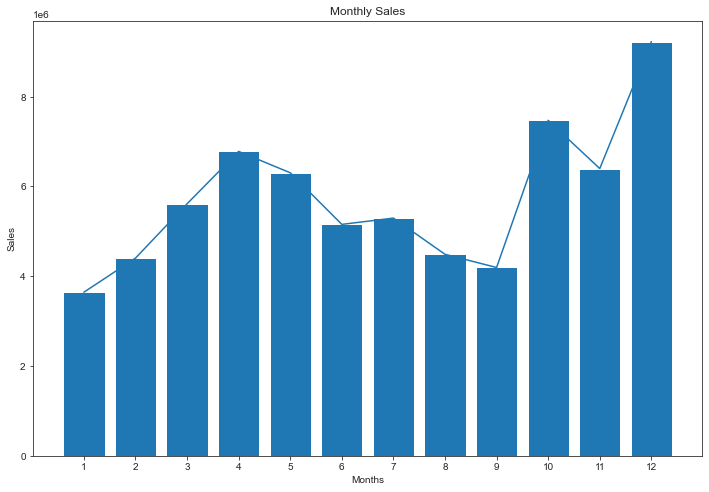

In [31]:
months=range(1,13)
plt.figure(figsize=(12,8))
plt.bar(months,monthly_sales['Sales'])
plt.plot(months,monthly_sales['Sales'])
plt.title('Monthly Sales')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')


In [32]:
'''The distribution of sales month wise shows a fair increase and decrease in the sales but later we get to see that the 
   sales tend to increase towards the last 3 months with being highest at the end month.'''

'The distribution of sales month wise shows a fair increase and decrease in the sales but later we get to see that the \n   sales tend to increase towards the last 3 months with being highest at the end month.'

In [33]:
'''Most of the data are on the left side of the bar plot but a few larger values are on the right, 
   the data can be said to be skewed to the right'''

'Most of the data are on the left side of the bar plot but a few larger values are on the right, \n   the data can be said to be skewed to the right'

In [34]:
#Now we visualise citywise sales to see the distribution of sales among different cities
city_sales=df1.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),33204,5.559816e+06,209588,5.590997e+06
Austin (TX),22306,3.619747e+06,139658,3.639164e+06
Boston (MA),45056,7.274820e+06,282224,7.323284e+06
Dallas (TX),33460,5.505256e+06,209240,5.535951e+06
Los Angeles (CA),66578,1.084287e+07,416650,1.090514e+07
New York City (NY),55864,9.270742e+06,351482,9.328635e+06
Portland (ME),5500,8.943785e+05,34288,8.995165e+05
Portland (OR),22606,3.721116e+06,141242,3.741465e+06
San Francisco (CA),100478,1.642292e+07,631040,1.652441e+07


Text(0, 0.5, 'Sales')

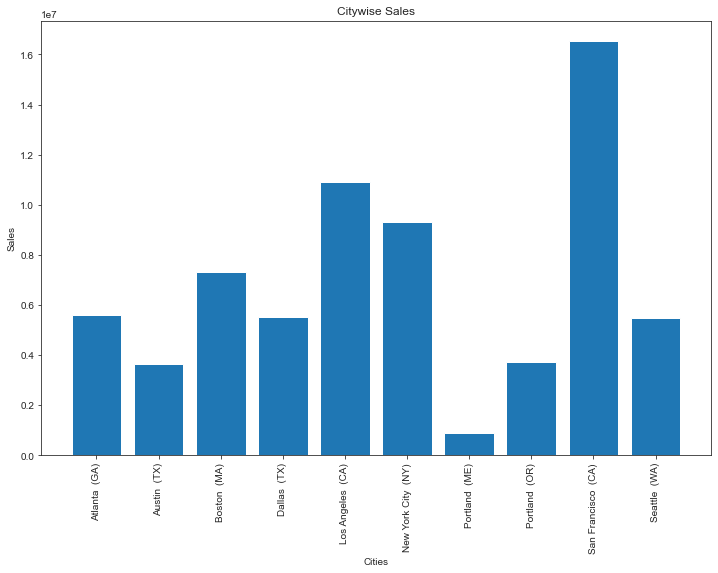

In [35]:
cities=[city for city,df in df1.groupby('City')] # Get Same Order of City after Group By.

plt.figure(figsize=(12,8))
plt.bar(cities,city_sales['Sales'])
plt.title('Citywise Sales')
plt.xticks(cities,rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales')

In [36]:
'''In the city-wise sales as well, we see good sales towards the cities in the middle -
   Los Angeles CA and New York City NY . And then we see San Francisco CA bringing the highest sales.'''

'In the city-wise sales as well, we see good sales towards the cities in the middle -\n   Los Angeles CA and New York City NY . And then we see San Francisco CA bringing the highest sales.'

###  Now, we can use the above graphs to answer the questions below - 

### a)Which city had the highest sales overall?


San Francisco (CA) has most number of sales.

### b)Which Month had the highest amount of sales overall?

In December we have maximum sales

### c)Most bought products per city.

In [37]:
#For this, we first need to find the sum of the “Quantity Ordered” by grouping by “Product” and"City"
df_group1 = df1.groupby(['Product', 'City'])['Quantity Ordered'].sum().sort_values(ascending = False)
df_group1.to_frame()

Quantity Ordered
Product                  City                                 
AAA Batteries (4-pack)   San Francisco  (CA)             14816
AA Batteries (4-pack)    San Francisco  (CA)             13110
USB-C Charging Cable     San Francisco  (CA)             11788
Lightning Charging Cable San Francisco  (CA)             11114
AAA Batteries (4-pack)   Los Angeles  (CA)                9934
...                                                        ...
LG Washing Machine       Austin  (TX)                       52
                         Portland  (OR)                     52
Vareebadd Phone          Portland  (ME)                     34
LG Washing Machine       Portland  (ME)                     22
LG Dryer                 Portland  (ME)                     12

[190 rows x 1 columns]

### Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.
   

   
   We saw the highest sales figures in San Franscisco CA. If we look at the quantity ordered against each city, the quantity 
   ordered values against products bought here is huge by a great margin, mainly,in, AAA, AA batteries , USB-C Charging Cable 
   and lightning charging cable. That means people are actively buying here.Hence, there are chances of purchase of other items
   as well. Also , products that are costly are not bought regularly. And this will be the case in every city. So this does 
   not cater to any loss to the retail shop.
   Hence, I'd suggest San Franscisco CA for establishing a new branch for the retail store.


### 5.Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city.


### a)What products are mostly sold at different times of the day?
### b)Which time of day has the most sales?
### Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.

In [38]:
import datetime
import os

In [39]:
#Converting Data Type of Order Date to Datatime
df1['Order Date'] = pd.to_datetime(df1['Order Date'])

<ipython-input-39-c896f3beacde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Order Date'] = pd.to_datetime(df1['Order Date'])


In [40]:
#Create Columns for Hours and Minutes
df1['Hour'] = df1['Order Date'].dt.hour
df1['Minute'] = df1['Order Date'].dt.minute
df1.head()


<ipython-input-40-1afc425565fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hour'] = df1['Order Date'].dt.hour
<ipython-input-40-1afc425565fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Minute'] = df1['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


In [41]:
#Creating a new column called session in order to display part of the day as Morning,Evening,Afternoon and Night
df1.assign(session=pd.cut(df1['Order Date'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,session
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25,Evening
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15,Afternoon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33,Afternoon
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33,Evening
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56,Evening
373696,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0,Afternoon
373697,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39,Morning
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30,Afternoon


In [ ]:
#Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night)

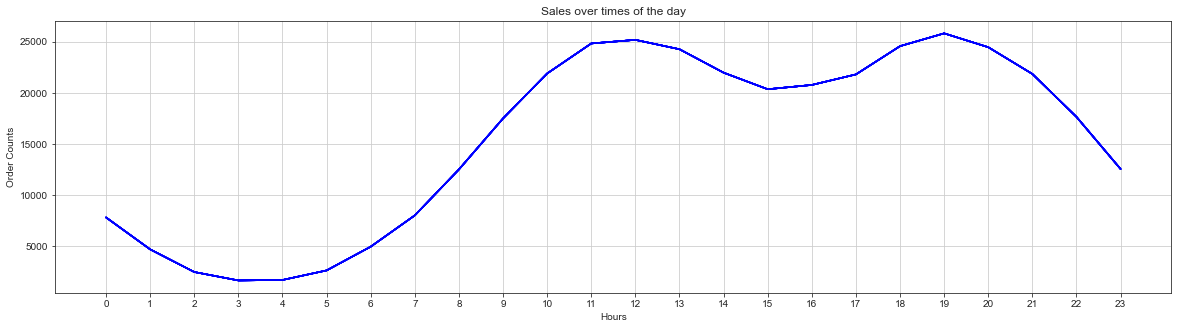

In [42]:

hour = [hr for hr, data in df1.groupby('Hour')]

plt.figure(figsize = (20,5))

plt.plot(hour, df1.groupby(['Hour']).count(), color = 'b')

plt.xticks(hour)

plt.grid()

plt.title('Sales over times of the day')

plt.xlabel('Hours')

plt.ylabel('Order Counts');

The above distribution shows changing sales over different times of the data.The Sales shows a good increase in 
the Afternoon and in the Evening.
My recommendation is slightly before 11am or 7pm

In [43]:
#a)What products are mostly sold at different times of the day?
#We need to find the most sold products per city at different times of the day.
df_group1 = df1.groupby(['Product', 'City','Hour'])['Quantity Ordered'].sum().sort_values(ascending = False)
df_group1.to_frame().head(50)

Quantity Ordered
Product                  City                Hour                  
AAA Batteries (4-pack)   San Francisco  (CA) 19                1180
                                             18                1048
                                             11                1028
                                             13                 996
AA Batteries (4-pack)    San Francisco  (CA) 12                 988
AAA Batteries (4-pack)   San Francisco  (CA) 20                 968
                                             12                 964
AA Batteries (4-pack)    San Francisco  (CA) 18                 896
                                             13                 882
AAA Batteries (4-pack)   San Francisco  (CA) 17                 874
USB-C Charging Cable     San Francisco  (CA) 11                 868
AA Batteries (4-pack)    San Francisco  (CA) 19                 854
AAA Batteries (4-pack)   San Francisco  (CA) 21                 840
AA Batteries (4-pack)    San Francisco  (CA) 10                 836
                                             11                 830
                                             20                 824
USB-C Charging Cable     San Francisco  (CA) 20                 810
AAA Batteries (4-pack)   San Francisco  (CA) 14                 800
                                             15                 792
USB-C Charging Cable     San Francisco  (CA) 19                 788
AAA Batteries (4-pack)   San Francisco  (CA) 10                 786
                                             16                 778
AA Batteries (4-pack)    San Francisco  (CA) 16                 776
Lightning Charging Cable San Francisco  (CA) 12                 776
                                             11                 770
USB-C Charging Cable     San Francisco  (CA) 18                 764
AA Batteries (4-pack)    San Francisco  (CA) 17                 754
                                             14                 752
Lightning Charging Cable San Francisco  (CA) 19                 748
USB-C Charging Cable     San Francisco  (CA) 12                 744
AA Batteries (4-pack)    San Francisco  (CA) 21                 738
AAA Batteries (4-pack)   Los Angeles  (CA)   11                 736
USB-C Charging Cable     San Francisco  (CA) 10                 728
AA Batteries (4-pack)    San Francisco  (CA) 15                 728
AAA Batteries (4-pack)   San Francisco  (CA) 22                 728
Lightning Charging Cable San Francisco  (CA) 13                 726
                                             17                 720
USB-C Charging Cable     San Francisco  (CA) 13                 720
                                             14                 712
Lightning Charging Cable San Francisco  (CA) 20                 704
AAA Batteries (4-pack)   Los Angeles  (CA)   20                 700
USB-C Charging Cable     San Francisco  (CA) 21                 700
Lightning Charging Cable San Francisco  (CA) 18                 698
Wired Headphones         San Francisco  (CA) 13                 698
USB-C Charging Cable     San Francisco  (CA) 16                 690
AAA Batteries (4-pack)   Los Angeles  (CA)   10                 690
AA Batteries (4-pack)    Los Angeles  (CA)   11                 680
AAA Batteries (4-pack)   Los Angeles  (CA)   12                 676
                         San Francisco  (CA) 9                  674
Wired Headphones         San Francisco  (CA) 18                 670

In [44]:
#b)Which time of day has the most sales?
'''Customer Visits Store or Order more between 11a.m. to 1p.m. and 6p.m. to 8.00p.m. This can be inferred from the line plot
   displaying sales over different times of the day.'''

'Customer Visits Store or Order more between 11a.m. to 1p.m. and 6p.m. to 8.00p.m. This can be inferred from the line plot\n   displaying sales over different times of the day.'

#### Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.

   The best working hours would be between 11a.m. to 1p.m. and 6p.m. to 8.00p.m as customers visit Store or Order more during 
   this time of the hour ie. usually afternoons and evenings.
   The best products for the retail stores in each city could be -
   AA and AAA Batteries are Sold most because they are used vey Commonly in Remote, Clock, Toys etc.
   Charging Cables and Headphones are also Important Products for Daily Usage Purpose.
   

### 6.What products are most often sold together?

In [45]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df2 = df1[df1['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df3 = df2[['Order ID', 'Grouped']].drop_duplicates()

In [46]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 49214
('Lightning Charging Cable', 'Lightning Charging Cable') 48122
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 43694
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 43268
('Wired Headphones', 'Wired Headphones') 42198
('Apple Airpods Headphones', 'Apple Airpods Headphones') 33600
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 28894
('iPhone', 'iPhone') 17776
('27in FHD Monitor', '27in FHD Monitor') 15754
('Google Phone', 'Google Phone') 14714


### What product sold the most? Why do you think it sold the most?

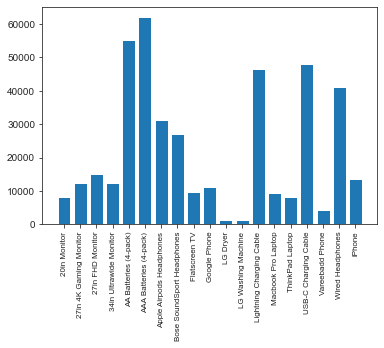

In [48]:
product_group = df1.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Now we can see what product sold the most, it’s AAA Batteries(4 pack). We can also see that AA Batteries (4 pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones are sold more than other products. Why are they sold the most? The first impression is that they are cheaper than other products. As a data scientist, let’s prove this hypothesis. We could do it by overlaying the graph by their actual price and see if they have direct correlation.



<ipython-input-49-aac9c3388db7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-49-aac9c3388db7>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


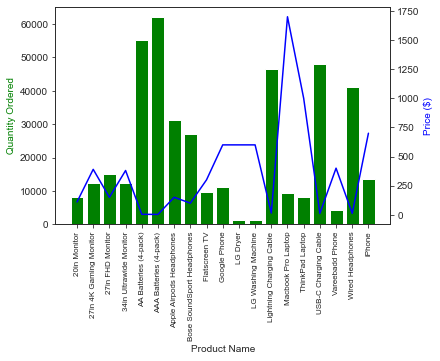

In [49]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = df1.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

Our hypothesis is true if the high sold products have low price. From the graph we can see it is the case for AAA Batteries and all products except the Macbook Pro Laptop and ThinkPad Laptop. They have decent orders eventhough they are expensive. We can say that there are many people in the world need laptops. So the laptops are the exception because the laptops have high demand.